# Country wide COVID_19 Dataset

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data=pd.read_csv('co19.csv')
data

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [3]:
#columns of dataset

data.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [4]:
#Finding the null values and data types of the datset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [5]:
#To get the descriptive analysis 

data.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [6]:
# Finding the un-unique values in each and every column

data.nunique()

Date                     31
Country                 213
Population              213
Total Tests            3173
Total Cases            3257
Total Deaths           1185
Total Recovered        2268
Serious or Critical     529
Active Cases           2680
dtype: int64

In [7]:
#data types of columns

data.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [8]:
#Finding null values

data.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [9]:
#filling the missing values for the following columns

data['Total Tests']=data['Total Tests'].fillna(data['Total Tests'].mean())
data['Total Cases']=data['Total Cases'].fillna(data['Total Cases'].mean())
data['Total Deaths']=data['Total Deaths'].fillna(data['Total Deaths'].mean())
data['Total Recovered']=data['Total Recovered'].fillna(data['Total Recovered'].mean())
data['Serious or Critical']=data['Serious or Critical'].fillna(data['Serious or Critical'].mean())
data['Active Cases']=data['Active Cases'].fillna(data['Active Cases'].mean())

In [10]:
#finding null values after filling

data.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

# Data Visualization

Univariate plot

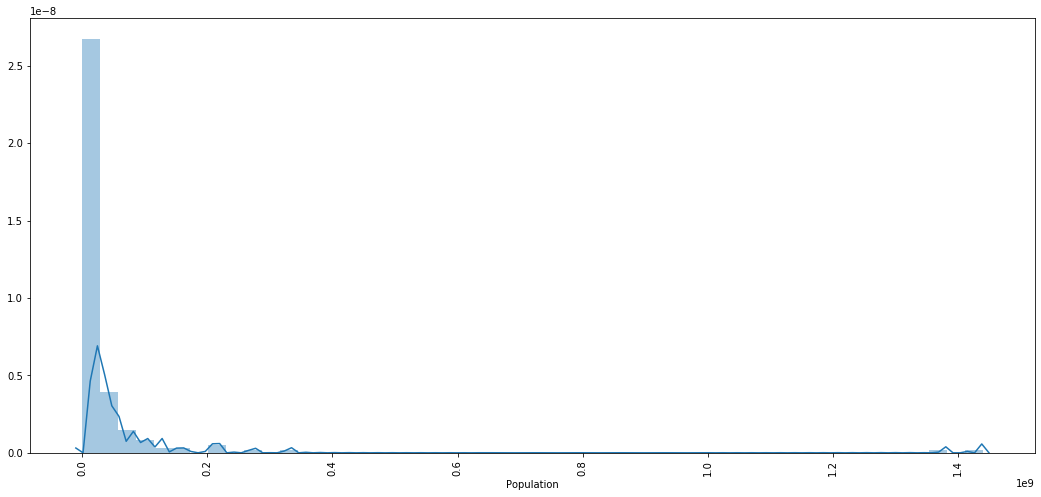

In [11]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sb.distplot(data['Population'])

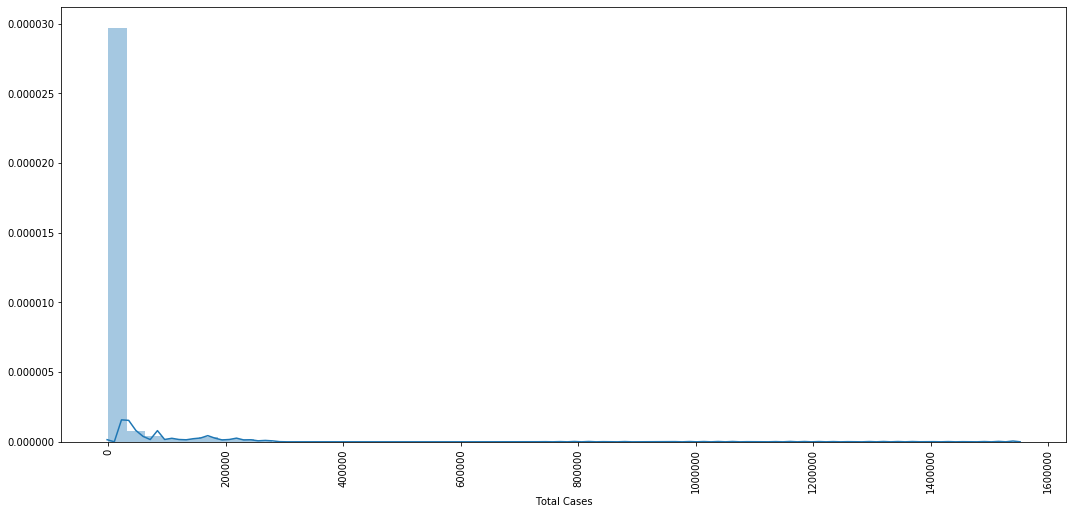

In [12]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sb.distplot(data['Total Cases'])

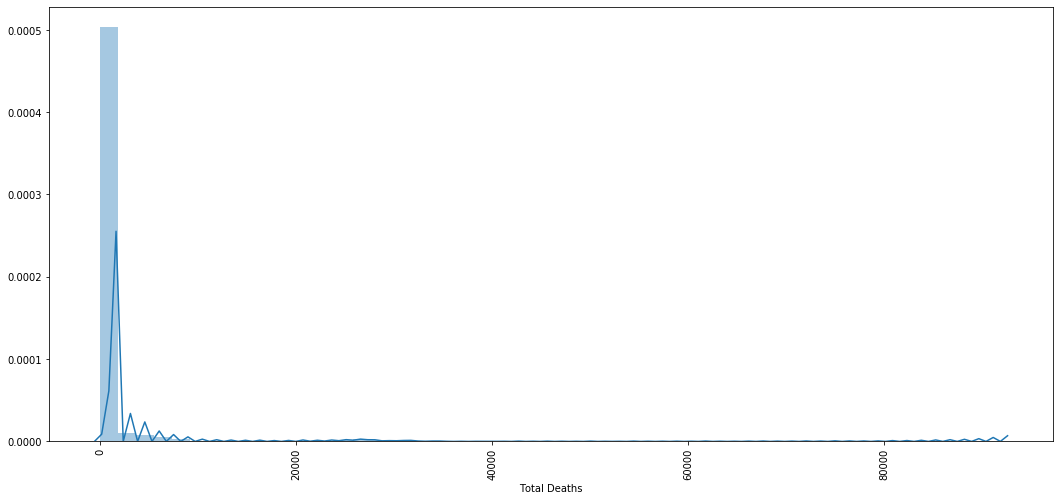

In [13]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sb.distplot(data['Total Deaths'])

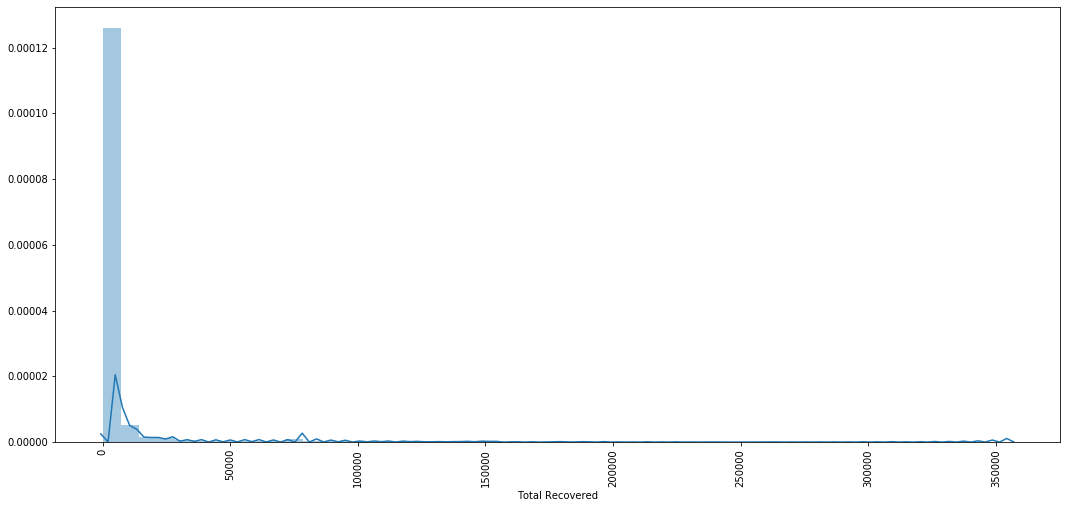

In [14]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sb.distplot(data['Total Recovered'])

Bivariate Plot

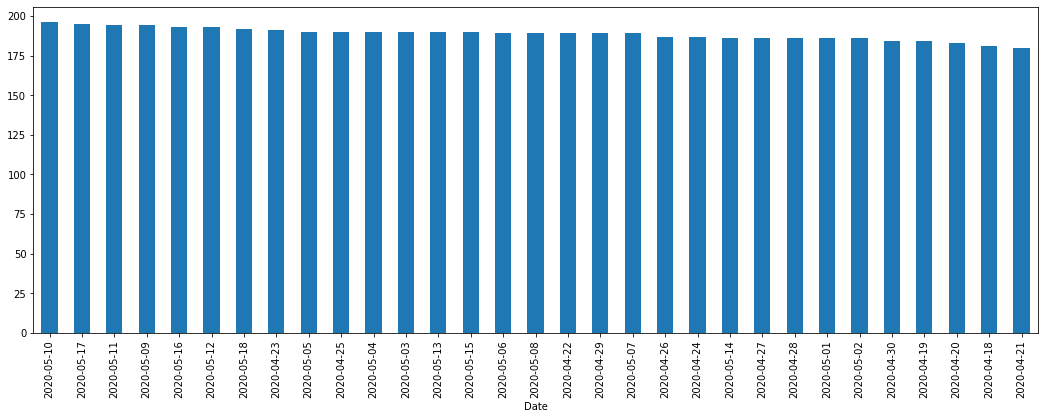

In [15]:
plt.figure(figsize=(18,6))
plot = data.groupby(['Date'])['Total Cases'].nunique().sort_values(ascending=False)
plot.plot(kind='bar')

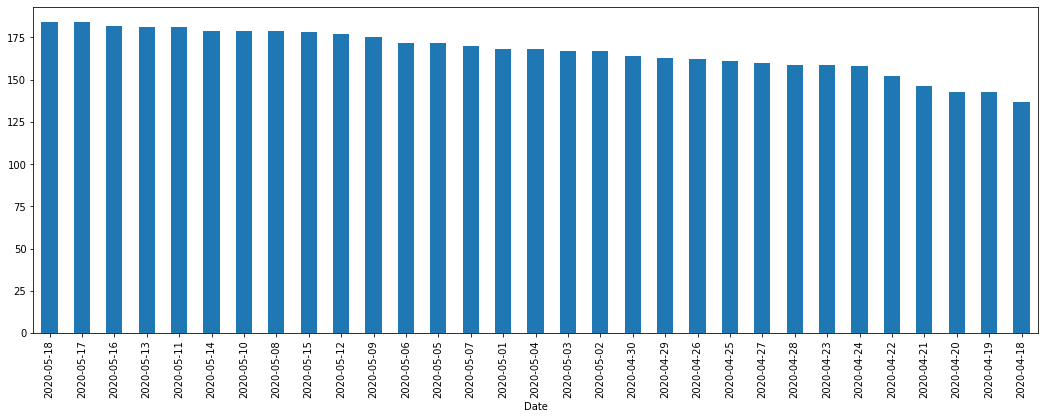

In [16]:
plt.figure(figsize=(18,6))
plot = data.groupby(['Date'])['Total Recovered'].nunique().sort_values(ascending=False)
plot.plot(kind='bar')

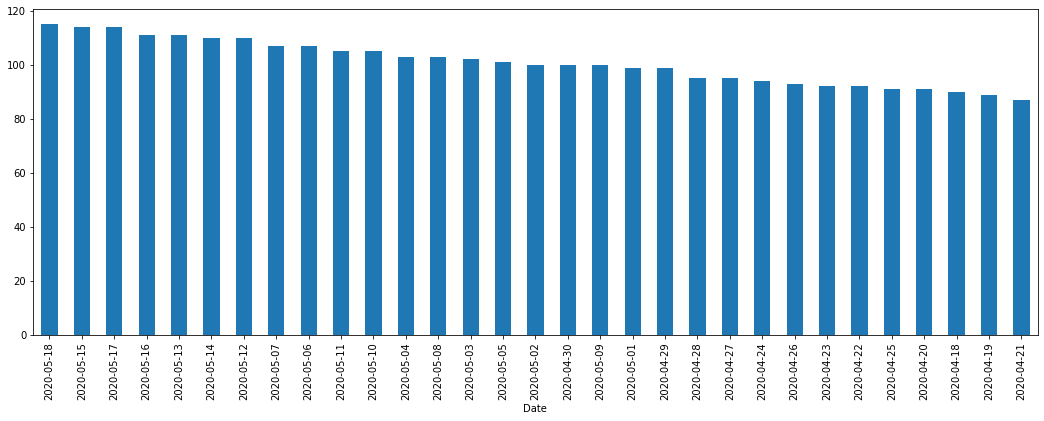

In [17]:
plt.figure(figsize=(18,6))
plot = data.groupby(['Date'])['Total Deaths'].nunique().sort_values(ascending=False)
plot.plot(kind='bar')

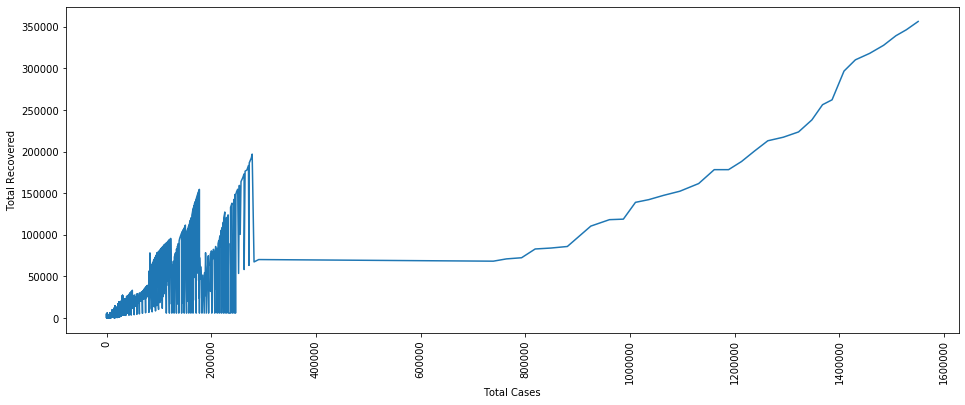

In [18]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sb.lineplot(x='Total Cases',y='Total Recovered',data=data)

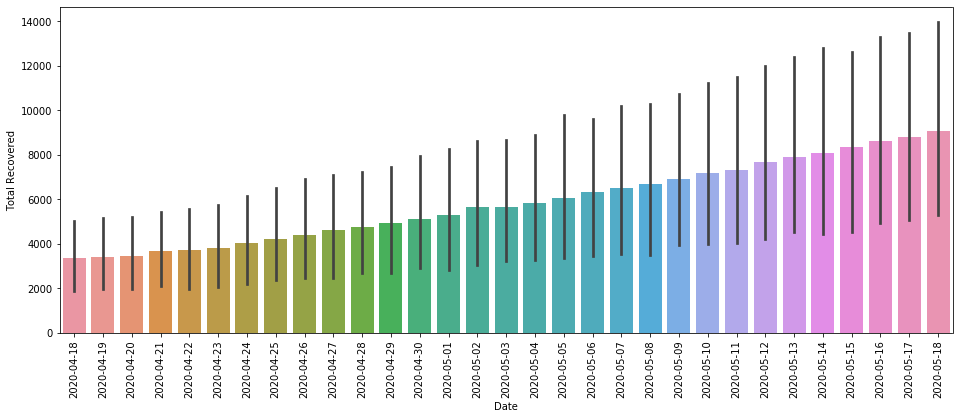

In [19]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sb.barplot(x='Date',y='Total Recovered',data=data)

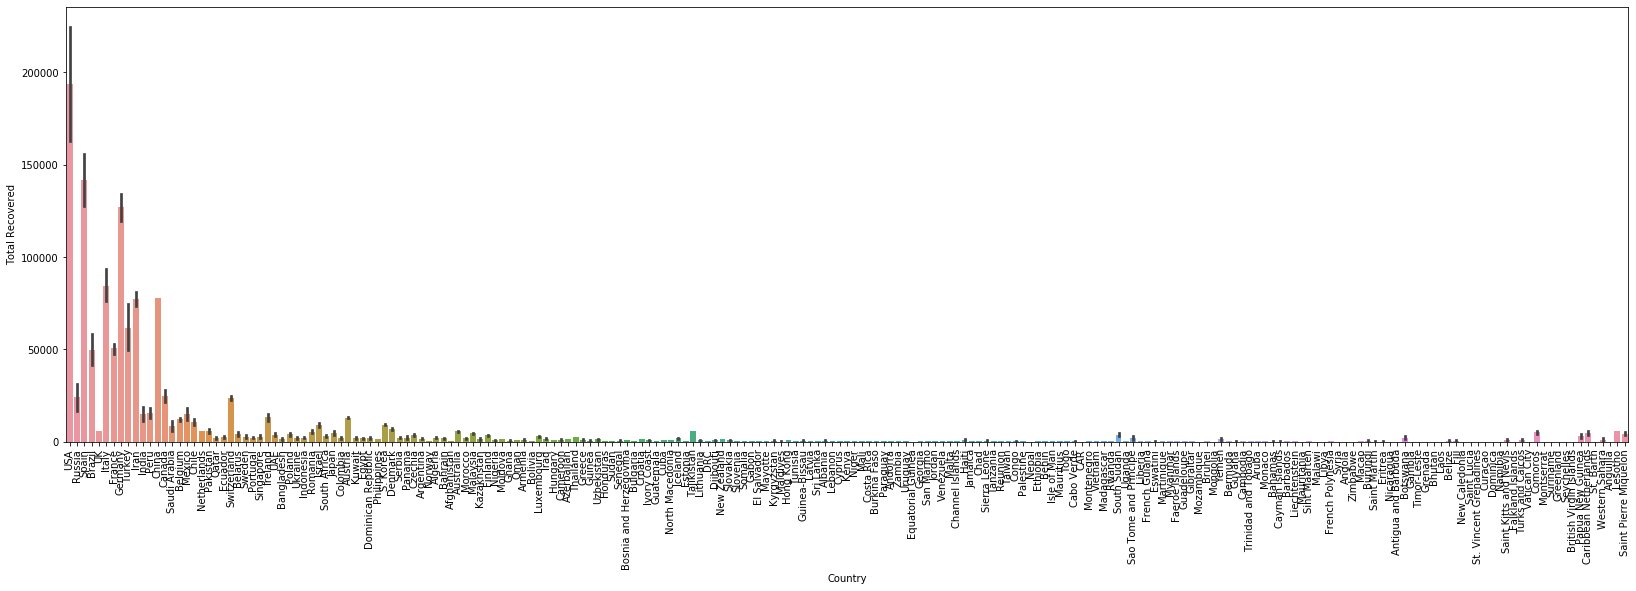

In [20]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=90)
sb.barplot(x='Country',y='Total Recovered',data=data)

# Data Preprocessing 

In [21]:
#data types of columns

data.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [22]:
#spliting date column as required 

data['day']=data['Date'].str.split('-').str[1]
data['month']=data['Date'].str.split('-').str[2]
data1=data.drop(['Date'],axis=1)

In [23]:
data1

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,day,month
0,USA,330774664,3.722145e+06,738792.0,39014.000000,68269.000000,13551.00000,631509.0,04,18
1,Russia,145927292,1.831892e+06,36793.0,313.000000,3057.000000,8.00000,33423.0,04,18
2,Spain,46752703,9.302300e+05,194416.0,20043.000000,74797.000000,7371.00000,99576.0,04,18
3,Brazil,212380932,6.298500e+04,36722.0,2361.000000,14026.000000,6634.00000,20335.0,04,18
4,UK,67844241,4.604370e+05,114217.0,15464.000000,5855.424185,1559.00000,98409.0,04,18
...,...,...,...,...,...,...,...,...,...,...
6598,St. Barth,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0,05,18
6599,Western Sahara,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0,05,18
6600,Anguilla,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.0,05,18
6601,Lesotho,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.0,05,18


In [24]:
#data types of columns

data1.columns

Index(['Country', 'Population', 'Total Tests', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Serious or Critical', 'Active Cases', 'day',
       'month'],
      dtype='object')

In [25]:
col = ['Country','day','month']

#label encoding

le=LabelEncoder()
data1[col]=data1[col].apply(lambda x:le.fit_transform(x))
data1

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,day,month
0,201,330774664,3.722145e+06,738792.0,39014.000000,68269.000000,13551.00000,631509.0,0,17
1,158,145927292,1.831892e+06,36793.0,313.000000,3057.000000,8.00000,33423.0,0,17
2,180,46752703,9.302300e+05,194416.0,20043.000000,74797.000000,7371.00000,99576.0,0,17
3,26,212380932,6.298500e+04,36722.0,2361.000000,14026.000000,6634.00000,20335.0,0,17
4,200,67844241,4.604370e+05,114217.0,15464.000000,5855.424185,1559.00000,98409.0,0,17
...,...,...,...,...,...,...,...,...,...,...
6598,182,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0,1,17
6599,209,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0,1,17
6600,5,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.0,1,17
6601,110,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.0,1,17


In [26]:
data1.dtypes

Country                  int32
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
day                      int32
month                    int32
dtype: object

In [27]:
# the Correlation between the different variables

data1.corr()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,day,month
Country,1.000000e+00,-2.867433e-02,0.143290,0.117565,0.116034,0.064000,0.080346,0.125181,5.319977e-19,5.829489e-19
Population,-2.867433e-02,1.000000e+00,0.223735,0.225844,0.176773,0.309361,0.170461,0.179359,2.669124e-17,6.038413e-18
Total Tests,1.432900e-01,2.237353e-01,1.000000,0.896328,0.803680,0.795205,0.728773,0.853809,6.394901e-02,-3.165231e-02
Total Cases,1.175655e-01,2.258444e-01,0.896328,1.000000,0.930952,0.821121,0.881620,0.975361,3.363032e-02,-1.680237e-02
Total Deaths,1.160336e-01,1.767733e-01,0.803680,0.930952,1.000000,0.794887,0.822177,0.879732,2.746937e-02,-1.261157e-02
Total Recovered,6.400028e-02,3.093609e-01,0.795205,0.821121,0.794887,1.000000,0.707686,0.687265,6.416855e-02,-3.157308e-02
Serious or Critical,8.034605e-02,1.704606e-01,0.728773,0.881620,0.822177,0.707686,1.000000,0.869204,-1.379096e-02,1.022173e-02
Active Cases,1.251805e-01,1.793593e-01,0.853809,0.975361,0.879732,0.687265,0.869204,1.000000,1.709871e-02,-1.024770e-02
day,5.319977e-19,2.669124e-17,0.063949,0.033630,0.027469,0.064169,-0.013791,0.017099,1.000000e+00,-8.391926e-01
month,5.829489e-19,6.038413e-18,-0.031652,-0.016802,-0.012612,-0.031573,0.010222,-0.010248,-8.391926e-01,1.000000e+00


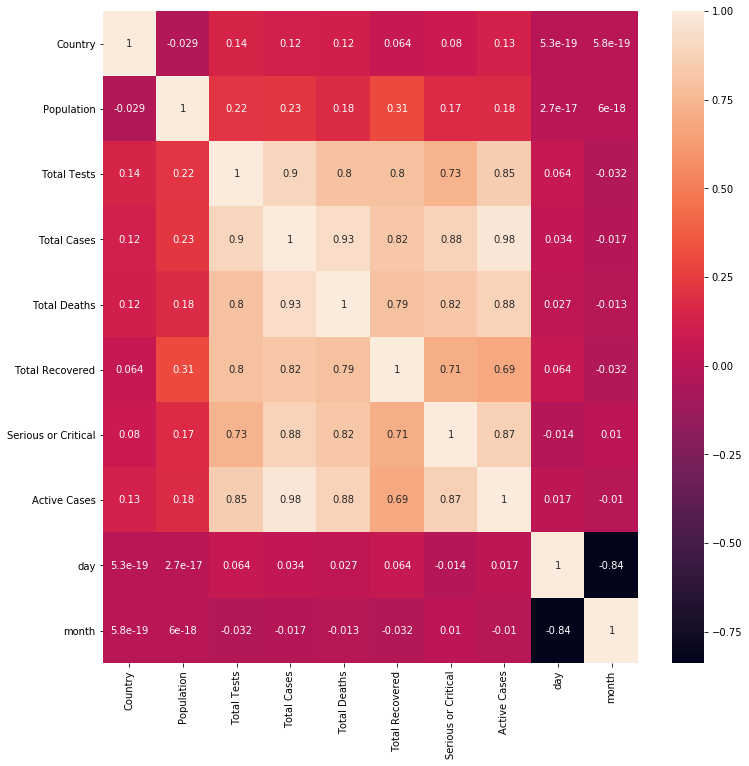

In [28]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(12,12))
sb.heatmap(data1.corr(),annot=True)

<Figure size 864x864 with 0 Axes>

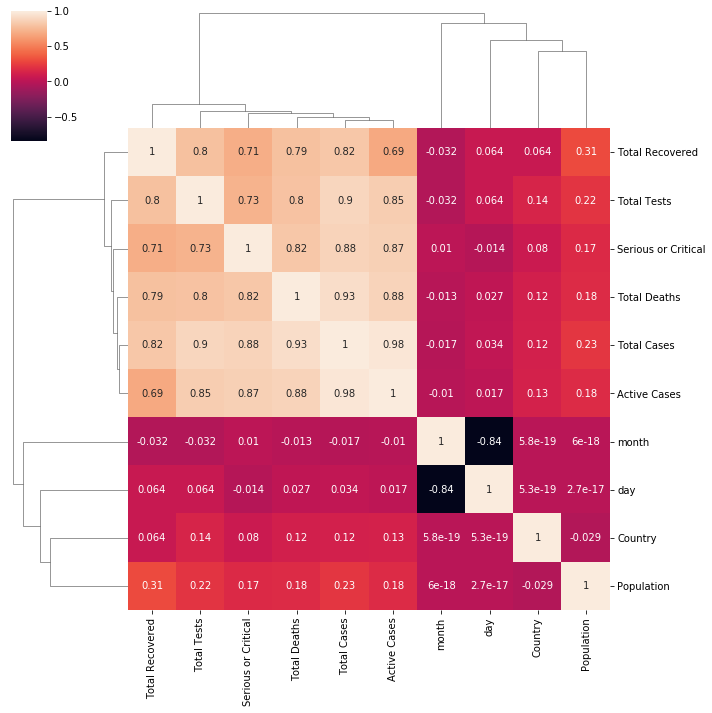

In [29]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(12,12))
sb.clustermap(data1.corr(),annot=True)

pairwise plot of relationship with the dataset

Multivariate plotting of dataset

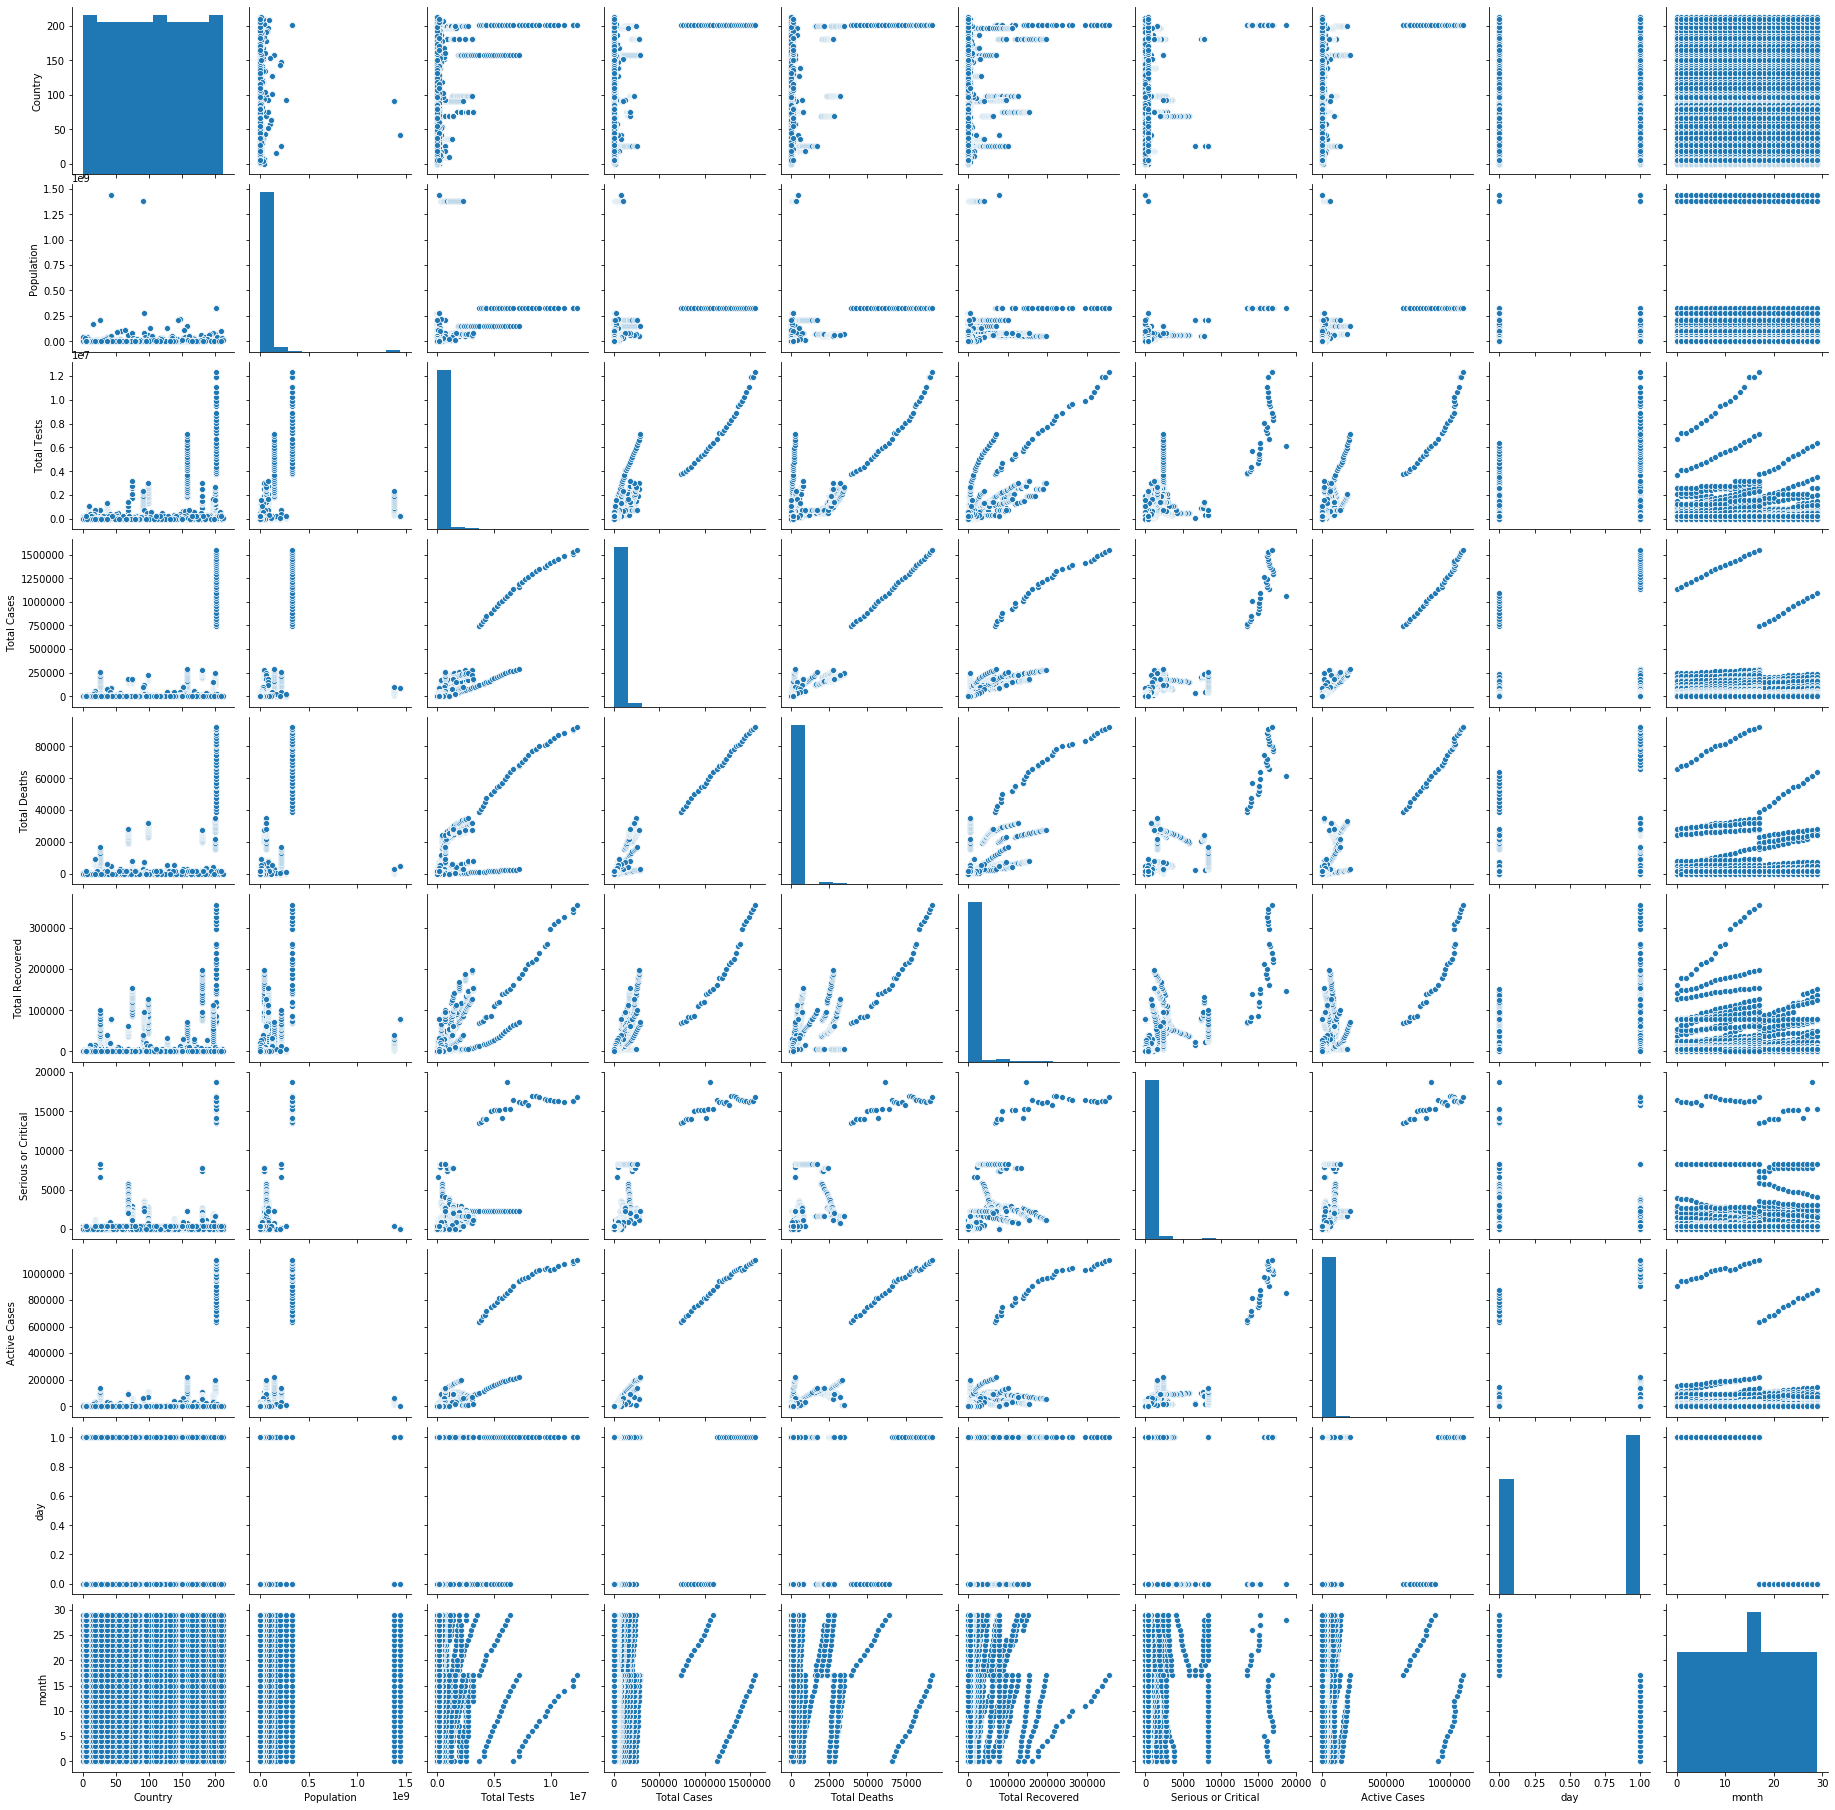

In [30]:
sb.pairplot(data1)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [31]:
x=data1.drop(['Total Deaths'],axis=1)
y=data1['Total Deaths']

In [32]:
#Getting the shape of the x and variables

print(x.shape)
print(y.shape)

(6603, 9)
(6603,)


In [33]:
#Preprocessing the data withStandardScaler

sc = StandardScaler()
x= sc.fit_transform(x)

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=50)

In [35]:
model=[LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor()]

# Finding metric data , cross validation and prediction

Using for loop to find n number of model buidling at once

In this we are also finding mean_absolute_error,mean_squared_error, root_mean_square, r2_score

Along with metrics we are finding cross validation and prediction

In [36]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    pred=m.predict(x_test)
    
    print('Finding mean_absolute_error,mean_squared_error, root_mean_square')
    print()
    print('MAE :',metrics.mean_absolute_error(y_test,pred))
    print('MSE :',metrics.mean_squared_error(y_test,pred))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('r2 score :',metrics.r2_score(y_test, pred))
    print('-'*100)
    print('cross validation and cross prediction')
    #cross valiadtion
    print()
    score=cross_val_score(m,x,y,cv=5)
    print('mean score :',score.mean())
    print('STD score:',score.std())
    print()
    #cross prediction
    predscore=cross_val_predict(m,x,y,cv=5)
    print("cross prediction",predscore)
    print()
    print('*'*100)



Finding mean_absolute_error,mean_squared_error, root_mean_square

MAE : 845.2904696326875
MSE : 3005369.794777685
RMSE : 1733.600240764198
r2 score : 0.9328823625018687
----------------------------------------------------------------------------------------------------
cross validation and cross prediction

mean score : 0.6630907302166621
STD score: 0.4788094404033721

cross prediction [43730.78853642  -400.07381178 15436.42404326 ...   -93.12135205
 -4031.5337463    319.55224238]

****************************************************************************************************
Finding mean_absolute_error,mean_squared_error, root_mean_square

MAE : 845.4499279097105
MSE : 3020234.7457645684
RMSE : 1737.8822588899884
r2 score : 0.9325503899128386
----------------------------------------------------------------------------------------------------
cross validation and cross prediction

mean score : 0.8270872151904062
STD score: 0.14822305861053864

cross prediction [43761.74355441  -36

# GridSearchCV

In [37]:
#gridsearch for RandomForestRegressor

param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True],
            }
rfr=RandomForestRegressor()
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Saving the model with joblib

In [38]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'covid.pkl')

['covid.pkl']

# conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib